# Reviewing, Cleaning, and Formulating Questions from the Aviation Database

- Step 1: import modules
    - Pandas
    - NumPy
    - new module, GeoPy, to be used and described
    - MatPlotLib
    - Seaborn
- Step 2: import original data `'data/Aviation_Data.csv'`
- Step 3: base analysis for patterns, inconsistencies, and question formulating
- Step 4: clean through each column of interest
- Step 5: export to a cleaned csv
- Step 6: create visualizations

### Importing Modules & Data, Reviewing the Raw Data

In [1]:
#base python packages to use for dataframing
import pandas as pd
import numpy as np

#imports for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing GeoPy is new to me, keeping in a separate cell in the event there is issues loading
import geopy
from geopy import geocoders
from geopy.geocoders import Nominatim

#variables needed for below calculations
geolocator = Nominatim(user_agent="reidmajka")
nom = Nominatim(domain='localhost:8080', scheme='http')

#per B. Hutchinson, importing "time" module will help to set delays as to not time-out the server as larger datasets are calculated on
import time

In [3]:
#read in the data csv in question and confirm the pandas DataFrame
df = pd.read_csv('data/Aviation_Data.csv')
df.head()

C:\Users\Reid Majka\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#observe the shape of the dataframe
df.shape

(90348, 31)

Keeping in mind for the future the 90,348 records, to make mental notes of the % of viable data by column

In [5]:
#assess the data column names for potential questions
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#Focusing on US-related accidents
df = df[df['Country'] == 'United States']

In [7]:
#determine entries based off aircraft damage:
df['Aircraft.damage'].value_counts()

Substantial    61675
Destroyed      16425
Minor           2119
Unknown           50
Name: Aircraft.damage, dtype: int64

The above indicates roughly 92% of aircraft are substantially damaged or completely destroyed, and will assume all (including minor and Unknown) need total replacement.

### Removing Duplicates based off of `Event.Id`

In [8]:
#NEED TO REMOVE DUPLICATE IDS
event_id_counts = df['Event.Id'].value_counts()
df = df[~df['Event.Id'].isin(event_id_counts[event_id_counts > 1].index)]
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


#### Columns to be reviewed for potential cleaning and analysis:
- Geographical Series:
    - `Location` (several variations of this data will be created / analyzed)
    - `Latitude` & `Longitude` (more to come here)
- Airplane-related Series:
    - `Make` (likely opportunity to clean up)
    - `Model` (likely opportunity to clean up)
- Time Series: `Event.Date` (cuts of this data to be made)
- to be continued...

First step: confirming there is a substantial amount of usable data within these columns.

In [9]:
columns = ['Location', 'Latitude', 'Longitude', 'Make', 'Model', 'Event.Date']
for series in columns:
    print('Series '+series+' dataset has '+str((df[series].isna().sum() / 90348)*100)+' percent null values')


Series Location dataset has 0.012175144994908576 percent null values
Series Latitude dataset has 53.70677823526807 percent null values
Series Longitude dataset has 53.71784654889981 percent null values
Series Make dataset has 0.022136627263470137 percent null values
Series Model dataset has 0.04095276043741975 percent null values
Series Event.Date dataset has 0.0 percent null values


Based on the above, Latitude and Longitude will need to be derived from the location dataset using `GeoPy`. Otherwise, at first glance, the Series listed are usable for analysis.

## Questions formulated off the first pass of the usable columns:

Given that the dataset details all aviation accidents over a given timeframe (to be analyzed below), my first questions are:

1. what is the most common aircraft attributed to these accidents?
2. Where are these accidents happening, and when?

Using these base-level questions, we can spin the answers into a business context: these damaged aircraft will likely either need to be repaired or completely replaced, and there is certainly opportunity in getting aircrafts +/- parts to the desired destination as efficiently as possible!

The plan is to combine the above questions and find areas of high counts, i.e.:

    1. Highest Model by Make
    2. Highest Make by Region
    3. Highest Model by Region
    

#### Assessing the Geographical Data

In [10]:
df['Latitude'].isna().value_counts()

True     48523
False    31941
Name: Latitude, dtype: int64

In [11]:
df['Longitude'].isna().value_counts()

True     48533
False    31931
Name: Longitude, dtype: int64

In [13]:
#find the location of an example row
df['Location'][2]
#df['Longitude'][2]

'Saltville, VA'

In [17]:
#using GeoPy to extract the coordinates of the location from the above index
location = geolocator.geocode('Saltville, VA')
print('GeoPy coordinates:'+str((location.latitude)))
print('GeoPy coordinates:'+str((location.longitude)))

#compare to to latitude and longitude within the original dataframe
print('dataset latitude:'+str(df['Latitude'][2]))
print('dataset longitude:'+str(df['Longitude'][2]))

GeoPy coordinates:36.8815031
GeoPy coordinates:-81.7620635
dataset latitude:36.922222999999995
dataset longitude:-81.878056


In [18]:
#function to take in df['Location'] data, output latitude

def new_lat(location):
    #time.sleep(.1)
    x = geolocator.geocode(location, timeout=None)
    if x:
        return x.latitude
    else:
        return None

# ***WARNING: BELOW CELLS TAKE APPX ~12-14 HOURS TO RUN ***

In [9]:
# Update 'Latitude' column only if there's valid location data
df['Latitude1'] = df.apply(lambda row: new_lat(row['Location']) if pd.notnull(row['Location']) else row['Latitude'], axis=1)

In [10]:
#Note: above cell kicked off 8/19/2023 12:58PM
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Latitude1
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,46.139
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,38.2558
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,36.8815
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,40.7907
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,40.7985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,38.9786
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,42.9304
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,34.2406
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,41.0784


In [11]:
#now for longitude

def new_long(location):
    #time.sleep(.1)
    x = geolocator.geocode(location, timeout=None)
    if x:
        return x.longitude
    else:
        return None

In [12]:
# Update 'Longitude' column only if there's valid location data. 8/20/2023 09:34AM. Finished at least 11:14PM
df['Longitude1'] = df.apply(lambda row: new_long(row['Location']) if pd.notnull(row['Location']) else row['Longitude'], axis=1)

In [13]:
geo_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Latitude1,Longitude1
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,46.139,-114.914
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,38.2558,-119.231
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,36.8815,-81.7621
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,40.7907,-124.167
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,40.7985,-81.375


- Going to write a lambda function utilizing GeoPy that takes the string from the Location column and returns geographical coordinates

In [20]:
#save the data to a new csv file
csv_filename = 'data/data_cleaned.csv'
df.to_csv(csv_filename, index=False)


In [21]:
#testing the save worked
df2 = pd.read_csv('data/data_cleaned.csv')

C:\Users\Reid Majka\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
df2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80459,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
80460,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
80461,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
80462,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# After adding coordinates based off location:

In [23]:
#create new column for state
df['State'] = df['Location'].str[-2:]
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH


In [24]:
#create a new column with "Region" that is populated from a dictionary
Regions = {
    'Northeast': ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Southeast': ['AL', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY'],
    'South': ['TX', 'OK', 'AR']
}

Regions

{'Northeast': ['CT',
  'DE',
  'ME',
  'MD',
  'MA',
  'NH',
  'NJ',
  'NY',
  'PA',
  'RI',
  'VT'],
 'Southeast': ['AL',
  'FL',
  'GA',
  'KY',
  'LA',
  'MS',
  'NC',
  'SC',
  'TN',
  'VA',
  'WV'],
 'Midwest': ['IL',
  'IN',
  'IA',
  'KS',
  'MI',
  'MN',
  'MO',
  'NE',
  'ND',
  'OH',
  'SD',
  'WI'],
 'West': ['AK',
  'AZ',
  'CA',
  'CO',
  'HI',
  'ID',
  'MT',
  'NV',
  'NM',
  'OR',
  'UT',
  'WA',
  'WY'],
 'South': ['TX', 'OK', 'AR']}

In [25]:
#function to assign the region based off the state abbreviation
def assign_region(state):
    for region, states in Regions.items():
        if state in states:
            return region
    return np.nan


In [26]:
#check that the function works
assign_region(df['State'][1])

'West'

In [27]:
# Apply the function to create the 'Region' column
df['Region'] = df['State'].apply(assign_region)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,Region
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,West
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,West
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Southeast
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA,West
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Midwest


In [28]:
df['Region'].value_counts()

West         31430
Southeast    16750
Midwest      15174
South         8475
Northeast     8303
Name: Region, dtype: int64

## Cleaning up the "Make" data

In [29]:
df['Make'].value_counts().head(30)

Cessna               20986
Piper                11423
CESSNA                4270
Beech                 4074
PIPER                 2506
Bell                  1857
Grumman               1050
Mooney                1048
Boeing                1029
BEECH                  892
Bellanca               862
Robinson               839
Hughes                 752
Schweizer              604
Air Tractor            577
Aeronca                477
Maule                  436
Champion               423
BELL                   402
Mcdonnell Douglas      388
Stinson                338
De Havilland           334
Aero Commander         327
BOEING                 317
Luscombe               316
Rockwell               313
Taylorcraft            312
Hiller                 307
Aerospatiale           304
North American         269
Name: Make, dtype: int64

In [30]:
#checking the data types
df['Make'].dtype

dtype('O')

In [31]:
#get uniform structure of the strings - all lowercase
df['Make'] = df['Make'].apply(lambda x: str(x).lower())

In [32]:
#based off the above value counts, start by checking values that contain the word 'cessna'
df['Make'][df['Make'].str.contains('cessna', case=False)].value_counts()

cessna                   25256
cessna aircraft co          24
cessna ector                 5
cessna/air repair inc        2
cessna wren                  2
cessna aircraft co.          1
cessna/weaver                1
cessna soloy                 1
cessna robertson             1
cessna aircraft              1
Name: Make, dtype: int64

In [33]:
#clean up "cessna"-related rows, consolidate into 'cessna' Make type
df.loc[df['Make'].str.contains('cessna', case=False), 'Make'] = 'cessna'

In [34]:
df['Make'].value_counts()

cessna             25294
piper              13929
beech               4966
bell                2259
boeing              1346
                   ...  
maniscalco             1
crump                  1
darrell                1
cleveland orson        1
akins                  1
Name: Make, Length: 7327, dtype: int64

Going to perform the same cleaning done with "cessna" to the other top 5: piper, beech, bell, boeing

In [35]:
#do the same as above for piper, beech, boeing, bell

df.loc[df['Make'].str.contains('piper', case=False), 'Make'] = 'piper'
df.loc[df['Make'].str.contains('beech', case=False), 'Make'] = 'beech'
df.loc[df['Make'].str.contains('boeing', case=False), 'Make'] = 'boeing'
#geo_df.loc[geo_df['Make'].str.contains('bell', case=False), 'Make'] = 'bell'

In [36]:
#taking a look at bell before cleaning
df['Make'][df['Make'].str.contains('bell', case=False)].value_counts().head(30)

bell                              2259
bellanca                          1020
bell helicopter textron             22
bell helicopter textron canada      22
bell helicopter                      4
bell-carson                          3
bell-k copter                        2
bell textron canada ltd              2
campbell earl s jr                   2
bell-transworld                      2
campbell                             2
bell/garlick                         2
bell/mason                           1
bell-cont 42g                        1
williams bell                        1
bell-transworld helicopter cor       1
collin campbell                      1
bell-transworld helicopters          1
troy bellah                          1
robert c. campbell                   1
bellance                             1
twibell                              1
michael w. campbell                  1
campbell w/smiley j                  1
rick campbell                        1
twibell richard dale     

Bell requires a different process, changing all names to 'bell' EXCEPT where a row contains 'bellanca'

In [37]:
#learned that adding a tilda ~ before str.contains will inverse the bool values, so ~str.contains is pulling anything that does
#^ NOT contain "bellanca", which is a different company.
df['Make'][df['Make'].str.contains('bell', case=False) & ~df['Make'].str.contains('bellanca', case=False)].value_counts()

bell                              2259
bell helicopter textron canada      22
bell helicopter textron             22
bell helicopter                      4
bell-carson                          3
bell textron canada ltd              2
bell-k copter                        2
bell/garlick                         2
bell-transworld                      2
campbell                             2
campbell earl s jr                   2
bell shelby aero                     1
bell-cont 42g                        1
campbell w/smiley j                  1
twibell richard dale                 1
bell-tellijohn                       1
bellet james j                       1
bellah                               1
hubbell                              1
bell-moore                           1
bell/soloy                           1
campbell john                        1
bell/textron                         1
beller                               1
bell 47g-3b                          1
bell/tsirah              

In [38]:
df.loc[df['Make'].str.contains('bell', case=False) & ~df['Make'].str.contains('bellanca', case=False), 'Make'] = 'bell'

In [39]:
#cleaned up Make column:
df['Make'].value_counts().head(40)

cessna                            25294
piper                             13982
beech                              5029
bell                               2366
boeing                             1407
mooney                             1266
grumman                            1116
bellanca                           1020
robinson                            910
hughes                              867
schweizer                           739
air tractor                         631
aeronca                             625
maule                               573
champion                            510
stinson                             429
mcdonnell douglas                   422
luscombe                            410
aero commander                      391
taylorcraft                         373
de havilland                        356
north american                      345
hiller                              344
aerospatiale                        337
rockwell                            328


In [40]:
#cleaning the makes below top 5, to ensure the cleaned data does not change the current top 5 makes
df.loc[df['Make'].str.contains('mooney', case=False), 'Make'] = 'mooney'
df.loc[df['Make'].str.contains('robinson', case=False), 'Make'] = 'robinson'
df.loc[df['Make'].str.contains('hughes', case=False), 'Make'] = 'hughes'
df.loc[df['Make'].str.contains('schweizer', case=False), 'Make'] = 'schweizer'
df.loc[df['Make'].str.contains('stinson', case=False), 'Make'] = 'stinson'
df.loc[df['Make'].str.contains('maule', case=False), 'Make'] = 'maule'

In [41]:
#last check
df['Make'].value_counts().head(40)

cessna                            25294
piper                             13982
beech                              5029
bell                               2366
boeing                             1407
robinson                           1349
mooney                             1315
grumman                            1116
bellanca                           1020
schweizer                           985
hughes                              880
air tractor                         631
aeronca                             625
maule                               574
champion                            510
stinson                             440
mcdonnell douglas                   422
luscombe                            410
aero commander                      391
taylorcraft                         373
de havilland                        356
north american                      345
hiller                              344
aerospatiale                        337
rockwell                            328


In [42]:
#removing 'nan' values from the list, for graphing purposes
bar_df = df[df['Make'] != 'nan']

In [43]:
bar_df['Make'].value_counts().head(40)

cessna                            25294
piper                             13982
beech                              5029
bell                               2366
boeing                             1407
robinson                           1349
mooney                             1315
grumman                            1116
bellanca                           1020
schweizer                           985
hughes                              880
air tractor                         631
aeronca                             625
maule                               574
champion                            510
stinson                             440
mcdonnell douglas                   422
luscombe                            410
aero commander                      391
taylorcraft                         373
de havilland                        356
north american                      345
hiller                              344
aerospatiale                        337
rockwell                            328


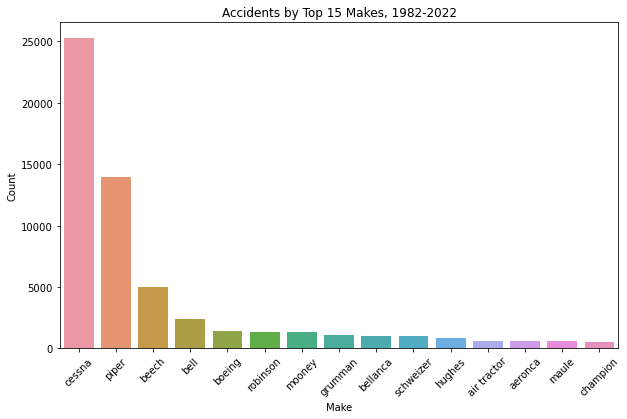

In [44]:
bar_data = bar_df['Make'].value_counts().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=bar_data.index, y=bar_data.values, ax=ax)
ax.set_xticklabels(bar_data.index, rotation=45)  # Rotate x-axis labels
ax.set_xlabel('Make')
ax.set_ylabel('Count');
ax.set_title('Accidents by Top 15 Makes, 1982-2022');


This looks good for now, we now have a cleaned `Make` Series for analysis. This will determine which Makes to focus on distributing, and will create subsets of the data for cleaning of the `Model` column, which is comprised of the models within each company, or `Make`.


In [46]:
#save the data to the existing csv file
csv_filename = 'data/data_cleaned.csv'
df.to_csv(csv_filename, index=False)

## Cleaning and creating Time-Series Columns

Steps to clean and organize the data for time series:
- create columns for `Year` and `Month`
- analyze seasonality of the data by year, and by month in any given year

In [47]:
#create a new column "month" and "year" to see if there is a trend amongst seasons
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Month'] = df['Event.Date'].apply(lambda x: x.month)
df['Year'] = df['Event.Date'].apply(lambda x: x.year)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,Region,Month,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,West,10,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,West,7,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Southeast,8,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA,West,6,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Midwest,8,1979


In [48]:
df['Year'].value_counts()

1982    3474
1983    3439
1984    3318
1985    2980
1986    2749
1987    2666
1988    2574
1989    2411
1990    2390
1991    2320
1992    2241
1993    2196
1995    2154
1994    2130
1996    2036
1998    2016
1999    2008
1997    1982
2000    1973
2003    1902
2001    1849
2002    1844
2005    1798
2007    1775
2004    1754
2008    1709
2006    1621
2011    1612
2009    1604
2012    1575
2010    1559
2018    1349
2016    1342
2017    1331
2014    1315
2015    1313
2013    1313
2019    1303
2022    1214
2021    1181
2020    1137
1979       2
1977       1
1948       1
1981       1
1962       1
1974       1
Name: Year, dtype: int64

Looks like there isn't sufficient data before 1982, so we will focus on years 1982-2022.

## Cleaning and analyzing `Model` Data

In [49]:
#first, convert all the data as type string
df['Model'] = df['Model'].astype(str)

In [50]:
#create a model grouping column to not alter original data
df['Model_group'] = df['Model']

#create a new copy of the dataframe to not alter the original, for now
model_df = df.copy()

In [51]:
top_makes = ['cessna', 'piper', 'beech', 'bell', 'boeing']
df4 = model_df[model_df['Make'].isin(top_makes)]
df4[df4['Make'] == 'beech']['Model_group'].value_counts().head(30)

A36       403
58        216
C23       188
V35B      151
35        142
95-B55    110
F33A      110
23         91
A36TC      75
V35        73
S35        67
58P        65
C24R       65
76         64
200        62
C35        59
77         58
A23        57
E18S       53
H35        53
36         52
B19        51
1900D      51
G35        50
K35        50
B36TC      47
A-36       47
A35        44
B35        41
95-C55     39
Name: Model_group, dtype: int64

After researching online, `beech` models are categorized by number; for example, the "35" models are categorized as the "Beechcraft Bonanza" (https://en.wikipedia.org/wiki/Beechcraft_Bonanza), more commonly known as "the doctor killer". Therefore, we need to clean the model Series to group by their two-digit attribute.

Looking at the data, it appears that the most common are 36, 58, 23, 35... for now, we will work with a few 

In [52]:
#write a function to filter Make = beech, then group by two-digit Model number, 
#and create a new column that has that two-digit attribute.
beech_models = ['35', '58', '23', '33', '36', '76', '77', '55', '24', '19']
beech_df = model_df.copy()
beech_df = beech_df[beech_df['Make'] =='beech']
for model in beech_models:
    beech_df.loc[df['Model_group'].notna() & df['Model_group'].str.contains(model), 'Model_group'] = model


In [53]:
beech_df['Model_group'].value_counts().head(20)

35       1143
36        664
23        479
55        425
58        352
33        324
19        240
24        213
76         81
77         70
200        62
E18S       53
C90        34
95         33
99         26
D18S       26
B200       26
C-45H      26
60         24
G18S       24
Name: Model_group, dtype: int64

Do the same for `Boeing`

In [54]:
model_df[model_df['Make'] == 'boeing']['Model_group'].value_counts().head(30)

A75N1          109
B75N1           47
737             46
E75             42
737-300         34
A75N1(PT17)     30
727-200         30
737-200         26
A75             24
757             23
767             22
757-232         20
757-222         20
727-232         16
737-7H4         16
737 7H4         16
737-222         14
727-223         14
E75N1           13
747             12
777             12
717-200         12
727-224         11
737-700         11
757-200         11
757-223         11
757-251         11
727-225         11
737-400         10
727             10
Name: Model_group, dtype: int64

In [55]:
#write a function to filter Make = boeing, then group by two-digit Model number, 
#and create a new column that has that two-digit attribute.
boeing_models = ['727', '737', '747', '757', '767', '777', '787']
boeing_df = model_df.copy()
boeing_df = boeing_df[boeing_df['Make'] =='boeing']
for model in boeing_models:
    boeing_df.loc[boeing_df['Model_group'].notna() & boeing_df['Model_group'].str.contains(model), 'Model_group'] = model


In [56]:
boeing_df['Model_group'].value_counts().head(30)

737             368
727             208
757             130
A75N1           109
747             108
767              91
B75N1            47
E75              42
777              38
A75N1(PT17)      30
A75              24
E75N1            13
717-200          12
PT-17            10
A-75              9
D75N1             9
A75N1 (PT17)      8
A75L3             6
B75-N1            6
A75L300           6
707-323C          6
DHC-8-102         5
B75               5
787               4
707-321B          4
PT17              4
IB75A             3
B-17G             3
A-75N1            3
75                3
Name: Model_group, dtype: int64

#### One caveat with Boeing - there is a '757' and '75' `Model`, so we need to treat the '75' model differently as to not combine with '757'

In [57]:
#cleaning the 'Make' = Boeing, 'Model' dataset
df5 = model_df[model_df['Make'] == 'boeing']
df5 = df5[df5['Model'].notna()]
df5 = df5[~df5['Model'].str.contains('757')] #tilde takes the negation of the command
df5[df5['Model'].str.contains('75')]['Model'].value_counts() #Boeing's model 75 series

A75N1                 109
B75N1                  47
E75                    42
A75N1(PT17)            30
A75                    24
E75N1                  13
D75N1                   9
A-75                    9
A75N1 (PT17)            8
A75L300                 6
B75-N1                  6
A75L3                   6
B75                     5
75                      3
A-75N1                  3
IB75A                   3
B-75                    2
B75-A75N1               2
A 75N1                  2
75A                     2
A75-N1                  1
E75-N1                  1
A75N-1                  1
D75-N1                  1
A75-L3                  1
PT-13/E-75              1
STEARMAN E75            1
E75L300                 1
B-75-N1                 1
A75SN1                  1
B75N                    1
N2S-1-A-75A             1
737-275C                1
A75N                    1
767-375                 1
A75N (PT17)             1
A75-300N1               1
1B75A                   1
E75NL       

In [58]:
#replace all entries containing '75' above as '75'
boeing_df.loc[boeing_df['Model_group'].notna() & boeing_df['Model_group'].str.contains('75') & ~boeing_df['Model_group'].str.contains('757'), 'Model_group'] = '75'
boeing_df[boeing_df['Model_group'].str.contains('75')]['Model_group'].value_counts()

75     356
757    130
Name: Model_group, dtype: int64

In [59]:
#re-check boeing
boeing_df['Model_group'].value_counts().head(20)

737          368
75           356
727          208
757          130
747          108
767           91
777           38
717-200       12
PT-17         10
707-323C       6
DHC-8-102      5
PT17           4
707-321B       4
787            4
B-17G          3
DC-9-82        2
PT 17          2
369D           2
369E           2
MD-11F         2
Name: Model_group, dtype: int64

In [60]:
model_df[model_df['Make'] == 'cessna']['Model'].value_counts().head(30)

152      2223
172      1609
172N     1093
150       773
172M      738
172P      647
180       607
182       583
150M      561
150L      439
140       395
170B      384
172S      362
182P      343
A188B     302
177       285
A185F     276
185       266
150F      259
182Q      254
150H      241
150G      236
177RG     231
T210N     229
172RG     227
210       219
150J      218
172K      208
182A      196
T210M     178
Name: Model, dtype: int64

In [61]:
#time to do the same exercise for cessna, and it appears a similar typography where there is 3 integers followed by subsets containing letters
cessna_list = ['152', '172', '150', '182', '180', '177', '210', '185', '206', '170', '188', '421', '402', '340', '310', '208', '195', '305', '207', '414' ,'140']
cessna_df = model_df.copy()
cessna_df = cessna_df[cessna_df['Make'] =='cessna']

for model in cessna_list:
    cessna_df.loc[cessna_df['Model_group'].notna() & cessna_df['Model_group'].str.contains(model, case=False), 'Model_group'] = model

In [62]:
cessna_df['Model_group'].value_counts().head(30)

172     6368
150     3126
182     2858
152     2368
210     1731
180     1052
185      880
206      826
177      728
188      727
170      689
310      574
140      435
207      304
421      294
402      252
208      198
340      163
195      163
120      157
175      155
305      135
414      131
441       37
550       36
401       34
205       33
175A      33
404       30
337       30
Name: Model_group, dtype: int64

### Two more: `Piper` and `Bell`

In [79]:
model_df[model_df['Make'] == 'piper']['Model_group'].value_counts().head(30)

PA-28-140     897
PA-18-150     573
PA-18         573
PA-28-180     554
PA-28-161     540
PA-28-181     497
PA-38-112     447
PA-24-250     347
PA-32-300     337
PA-28R-200    322
PA-12         321
PA-22-150     280
PA-23-250     255
PA-25-235     248
PA-31-350     245
PA28          233
J3C-65        219
PA-32-260     206
PA-30         202
PA-22         196
PA-34-200T    186
PA-28-151     169
PA-28-235     168
PA-32R-300    165
PA-28         141
PA-20         130
PA-24-260     115
PA-28R-180    111
PA-44-180      97
PA-22-160      96
Name: Model_group, dtype: int64

In [80]:
#most of them start with "PA", which seems unnecessary, so we will again focus on the middle two digits
piper_list = ['-28-', '-32-', '-18-', '-20-', '-44-', '-38-', '-34-', '-22-', '-24-', '-30-', '-23-', '-31-']

piper_df = model_df.copy()
piper_df = piper_df[piper_df['Make'] =='piper']

for model in piper_list:
    piper_df.loc[piper_df['Model_group'].notna() & piper_df['Model_group'].str.contains(model, case=False), 'Model_group'] = model

In [81]:
piper_df['Model_group'].value_counts().head(30)

-28-            3071
-18-             725
-32-             651
-24-             591
PA-18            573
-22-             565
-38-             449
-23-             372
-34-             352
PA-28R-200       322
PA-12            321
-31-             318
PA-25-235        248
PA28             233
J3C-65           219
PA-30            202
PA-22            196
PA-32R-300       165
PA-28            141
PA-20            130
PA-28R-180       111
-44-             107
PA18              87
PA-32R-301T       86
PA-28R-201T       82
PA-46-310P        76
PA-28R-201        75
PA-32RT-300T      74
PA-32R-301        70
J-3               67
Name: Model_group, dtype: int64

In [82]:
#The above is ugly, so we're going to format back int "PA-##" format
piper_list = ['-28-', '-32-', '-18-', '-20-', '-44-', '-38-', '-34-', '-22-', '-24-', '-30-', '-23-', '-31-']

for model in piper_list:
    piper_df.loc[piper_df['Model_group'].notna() & piper_df['Model_group'].str.contains(model, case=False), 'Model_group'] = str('PA-'+model[1:3])

In [83]:
piper_df['Model_group'].value_counts().head(30)

PA-28           3212
PA-18           1298
PA-22            761
PA-32            706
PA-24            649
PA-38            508
PA-23            420
PA-34            379
PA-31            364
PA-28R-200       322
PA-12            321
PA-25-235        248
PA28             233
J3C-65           219
PA-30            214
PA-32R-300       165
PA-20            151
PA-44            114
PA-28R-180       111
PA18              87
PA-32R-301T       86
PA-28R-201T       82
PA-46-310P        76
PA-28R-201        75
PA-32RT-300T      74
PA-32R-301        70
PA-32RT-300       67
J-3               67
PA-46-350P        65
PA-28RT-201       65
Name: Model_group, dtype: int64

In [86]:
#a few more Piper's to clean:
piper_df.loc[piper_df['Model_group'].str.contains('PA18', case=False), 'Model_group'] = 'PA-18'
piper_df.loc[piper_df['Model_group'].str.contains('-28R', case=False), 'Model_group'] = 'PA-28'
piper_df.loc[piper_df['Model_group'].str.contains('-32R', case=False), 'Model_group'] = 'PA-32'

In [87]:
piper_df['Model_group'].value_counts().head(30)

PA-28         3967
PA-18         1407
PA-32         1210
PA-22          761
PA-24          649
PA-38          508
PA-23          420
PA-34          379
PA-31          364
PA-12          321
PA-25-235      248
PA28           233
J3C-65         219
PA-30          214
PA-20          151
PA-44          114
PA-46-310P      76
J-3             67
PA-46-350P      65
PA 18-150       59
PA-11           59
PA28R           56
PA32            55
PA-25           51
J3C             48
PA46            47
PA-18A          46
PA22            46
PA-14           40
PA-16           38
Name: Model_group, dtype: int64

## LAST ONE! `BELL`

In [88]:
model_df[model_df['Make'] == 'bell']['Model_group'].value_counts().head(30)

206B        452
206L-1      134
407         100
206          99
47G          96
47G-2        86
206L-3       83
47G-3B-1     65
47D1         55
UH-1B        53
47G-5        35
UH-1H        33
OH-58A       33
47G2         31
212          29
206L         29
47G-4A       27
47G-2A       26
206B III     24
206-L4       23
206B3        22
206B-III     21
OH-58C       20
47G-3B1      19
47G-5A       17
206BIII      17
222          17
205A-1       16
47G-3B       16
47G3B1       16
Name: Model_group, dtype: int64

Based on researching Bell Aviation, their inventory of helicopters is very nuanced, and we will recommend that helicopters be grouped separately for our analysis (i.e., when recommending which `model` to distribute, we will simply say "helicopter").

In [89]:
bell_df = model_df.copy()
bell_df = bell_df[bell_df['Make'] =='bell']

## Now, to merge the `model_group` dataframes back into our `Model_df` dataframe

Issue: in order to clean the `model` series, I created four different datasets based off the original `model_df['Make']` data. This was cleaned in a new column called `model_group`, and merged into one dataframe `merged_df`. I want to replace the data in the original `model_df` dataframe with the data cleaned in `merged_df`.

Option 1:
1. create a list of indexes within each Make datasets
2. write a for loop that goes through each index within model_df (entire dataset), checks if the merged dataset has that index, and populates `model_df['Model group']` with  `merged_df['Model_group']` string

Option 2:
1. merge `merged_df` and `model_df` together, and filter out indices from `model_df` that are in `merged_df`, which should hopefully result in the same indices as `model_df`

In [91]:
make_df = pd.concat([beech_df, piper_df, boeing_df, cessna_df, bell_df], axis=0)

In [92]:
make_df.shape

(48078, 36)

In [93]:
#save all the new columns into a new copy of the csv file
csv_filename = 'data/make_cleaned.csv'
make_df.to_csv(csv_filename, index=False)

# VISUALIZATIONS GO HERE


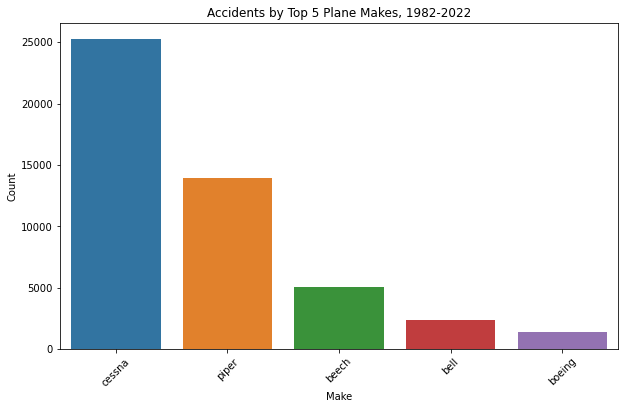

In [95]:
#bar graph for top 5 makes by count
make_bar = make_df['Make'].value_counts().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=make_bar.index, y=make_bar.values, ax=ax)
ax.set_xticklabels(make_bar.index, rotation=45)  # Rotate x-axis labels
ax.set_xlabel('Make')
ax.set_ylabel('Count');
ax.set_title('Accidents by Top 5 Plane Makes, 1982-2022');

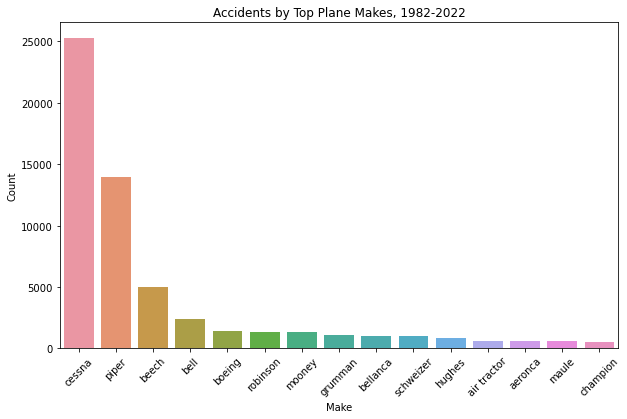

In [125]:
bar_data = df['Make'].value_counts().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=bar_data.index, y=bar_data.values, ax=ax)
ax.set_xticklabels(bar_data.index, rotation=45)  # Rotate x-axis labels
ax.set_xlabel('Make')
ax.set_ylabel('Count');
ax.set_title('Accidents by Top Plane Makes, 1982-2022');


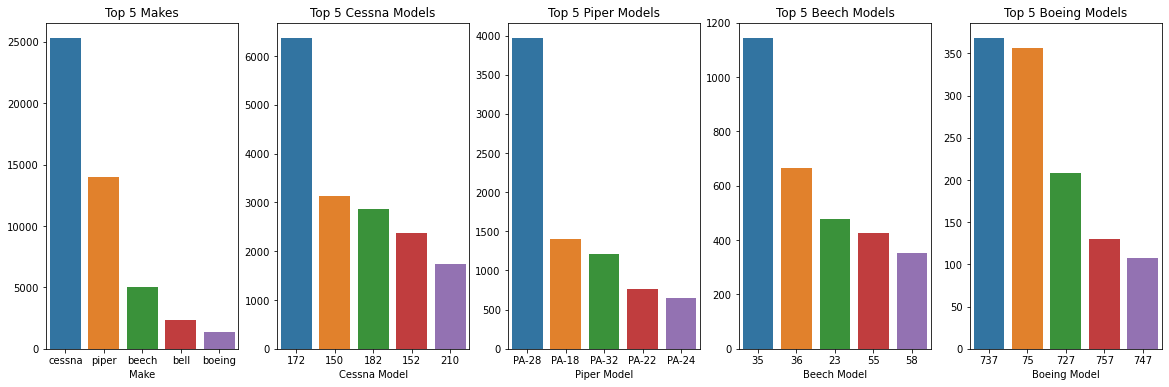

In [100]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
cessna_bar = make_df[make_df['Make'] == 'cessna']['Model_group'].value_counts().sort_values(ascending=False).head(5)
piper_bar = make_df[make_df['Make'] == 'piper']['Model_group'].value_counts().sort_values(ascending=False).head(5)
boeing_bar = make_df[make_df['Make'] == 'boeing']['Model_group'].value_counts().sort_values(ascending=False).head(5)
beech_bar = make_df[make_df['Make'] == 'beech']['Model_group'].value_counts().sort_values(ascending=False).head(5)

sns.barplot(x=make_bar.index, y=make_bar.values, ax=axs[0])
sns.barplot(x=cessna_bar.index, y=cessna_bar.values, ax=axs[1]);
sns.barplot(x=piper_bar.index, y=piper_bar.values, ax=axs[2]);
sns.barplot(x=beech_bar.index, y=beech_bar.values, ax=axs[3]);
sns.barplot(x=boeing_bar.index, y=boeing_bar.values, ax=axs[4]);

axs[0].set_xlabel('Make')
axs[1].set_xlabel('Cessna Model')
axs[2].set_xlabel('Piper Model')
axs[3].set_xlabel('Beech Model')
axs[4].set_xlabel('Boeing Model')

axs[0].set_title('Top 5 Makes')
axs[1].set_title('Top 5 Cessna Models')
axs[2].set_title('Top 5 Piper Models')
axs[3].set_title('Top 5 Beech Models')
axs[4].set_title('Top 5 Boeing Models');

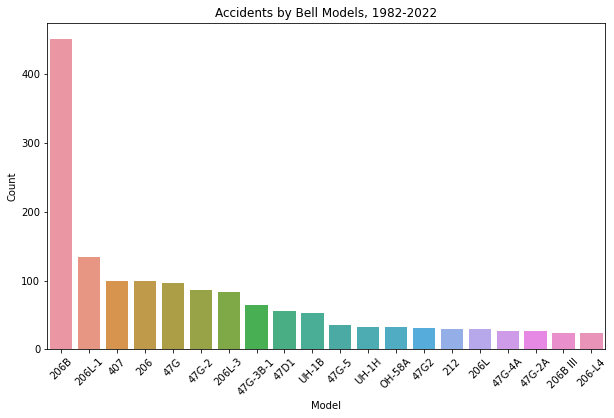

In [101]:
#Bell chart as a one-off
bell_bar = make_df[make_df['Make'] == 'bell']['Model_group'].value_counts().sort_values(ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=bell_bar.index, y=bell_bar.values, ax=ax)
ax.set_xticklabels(bell_bar.index, rotation=45)  # Rotate x-axis labels
ax.set_xlabel('Model')
ax.set_ylabel('Count');
ax.set_title('Accidents by Bell Models, 1982-2022');

### Time-series visualizations

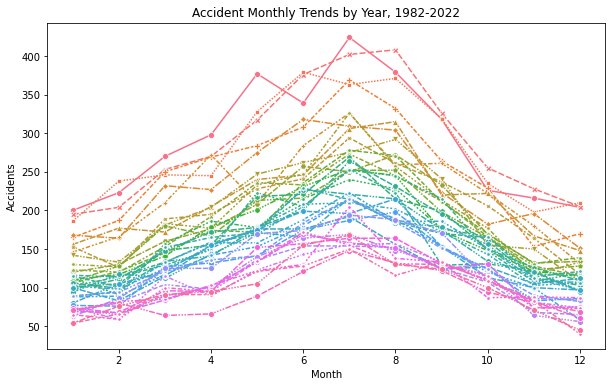

In [102]:
df2 = df[df['Year'] >= 1982]
df2 = df2.groupby(['Month', 'Year']).size().unstack(fill_value=0)

# Create a Seaborn lineplot using the Figure and Axes format
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df2, markers=True, ax=ax)

plt.title('Accident Monthly Trends by Year, 1982-2022')
plt.xlabel('Month')
plt.ylabel('Accidents')
ax.legend().set_visible(False);

In [103]:
time_data = df[df['Year'] >= 1982]
make_time_data = time_data['Year'].groupby(df['Make']).value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x='Year', y=make_time_data.values, hue='Make', data=make_time_data, marker='o')
#ax.set_xticklabels(bar_data3.index)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Accidents by Make, 1982-2022');

C:\Users\Reid Majka\anaconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 618x107933 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x432 with 1 Axes>

### Regional Visualizations

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

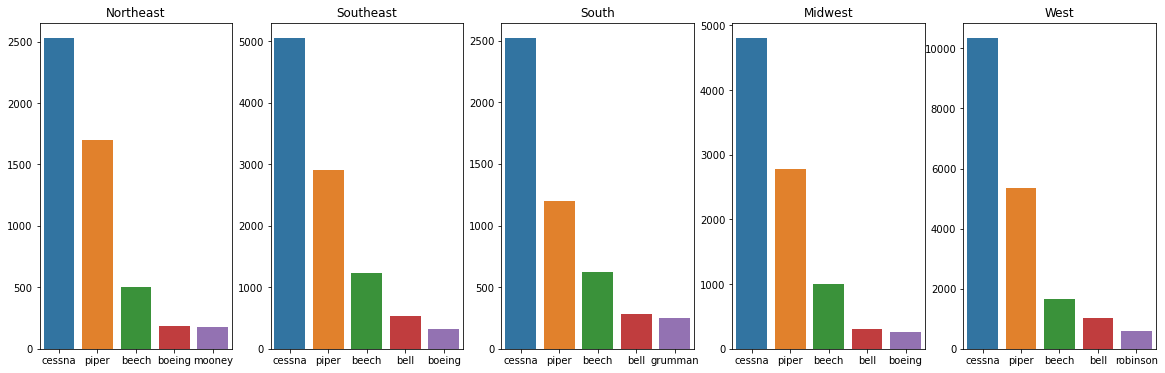

In [104]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
northeast_bar = df[df['Region'] == 'Northeast']['Make'].value_counts().sort_values(ascending=False).head(5)
south_bar = df[df['Region'] == 'South']['Make'].value_counts().sort_values(ascending=False).head(5)
west_bar = df[df['Region'] == 'West']['Make'].value_counts().sort_values(ascending=False).head(5)
midwest_bar = df[df['Region'] == 'Midwest']['Make'].value_counts().sort_values(ascending=False).head(5)
southeast_bar = df[df['Region'] == 'Southeast']['Make'].value_counts().sort_values(ascending=False).head(5)

sns.barplot(x=northeast_bar.index, y=northeast_bar.values, ax=axs[0])
sns.barplot(x=south_bar.index, y=south_bar.values, ax=axs[2]);
sns.barplot(x=west_bar.index, y=west_bar.values, ax=axs[4]);
sns.barplot(x=midwest_bar.index, y=midwest_bar.values, ax=axs[3]);
sns.barplot(x=southeast_bar.index, y=southeast_bar.values, ax=axs[1]);

axs[0].set_title('Northeast')
axs[1].set_title('Southeast')
axs[2].set_title('South')
axs[3].set_title('Midwest')
axs[4].set_title('West')

axs.set_xlabel('Top 5 Makes');

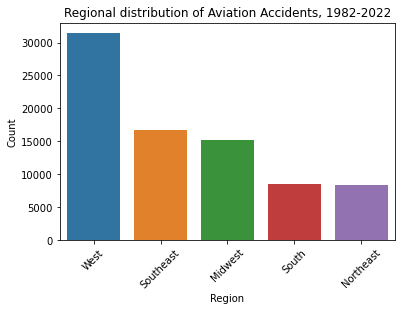

In [105]:
#total by region bar graph
region_bar = df[df['Region'].notna()]['Region'].value_counts().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(x=region_bar.index, y=region_bar.values, ax=ax)
ax.set_xticklabels(region_bar.index, rotation=45)  # Rotate x-axis labels
ax.set_xlabel('Region')
ax.set_ylabel('Count');
ax.set_title('Regional distribution of Aviation Accidents, 1982-2022');

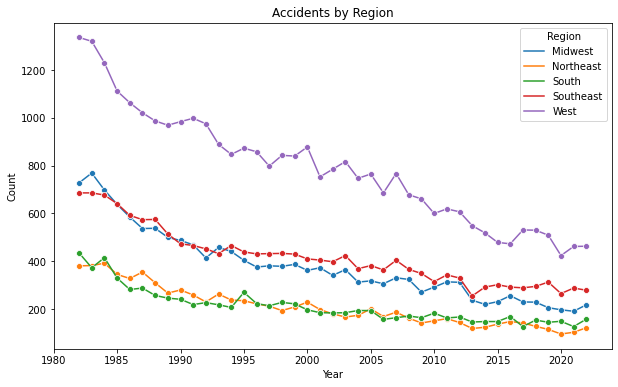

In [94]:
bar_data4 = df[df['Year'] >= 1982]
bar_data4 = bar_data4['Year'].groupby(df['Region']).value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x='Year', y=bar_data4.values, hue='Region', data=bar_data4, marker='o')
#ax.set_xticklabels(bar_data4.index)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Accidents by Region');

In [138]:
top_5_makes = list(bar_data.keys())

In [106]:
#now for some time series
df['Event.Date'].apply(type).unique()

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object)

In [123]:
years_df = df[df['Year'] >= 1982]
years = years_df.groupby('Year').size()
years

Year
1982    3474
1983    3439
1984    3318
1985    2980
1986    2749
1987    2666
1988    2574
1989    2411
1990    2390
1991    2320
1992    2241
1993    2196
1994    2130
1995    2154
1996    2036
1997    1982
1998    2016
1999    2008
2000    1973
2001    1849
2002    1844
2003    1902
2004    1754
2005    1798
2006    1621
2007    1775
2008    1709
2009    1604
2010    1559
2011    1612
2012    1575
2013    1313
2014    1315
2015    1313
2016    1342
2017    1331
2018    1349
2019    1303
2020    1137
2021    1181
2022    1214
dtype: int64

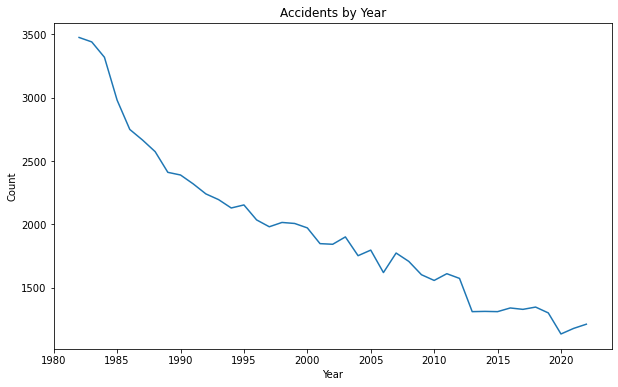

In [124]:
bar_data2 = years
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=bar_data2, ax=ax)
#ax.set_xticklabels(bar_data2.index)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Accidents by Year');